## ML crash course exercises by Google - https://developers.google.com/machine-learning/crash-course/exercises


Other resurces:
* https://pytorch.org/vision/stable/transforms.html
* https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html
* https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/
* https://horace.io/brrr_intro.html
* https://wandb.ai/mostafaibrahim17/ml-articles/reports/A-Deep-Dive-Into-Learning-Curves-in-Machine-Learning--Vmlldzo0NjA1ODY0
* https://pytorch.org/vision/0.15/io.html


# 04. Pytorch Custom Dataset

How to get your own data into Pytorch?

One of the ways to do so is via: custom datasets.

## Domain Librares
Depending on what you are working on: vision, text, audio, recommendation, you will have to look into each of the PyTorch domain libraries existing data loading functions and customizable data loading functions.

Chatgpt link - https://chatgpt.com/share/6714c6e3-2cb0-8008-84d4-6d4dd7c80014

In [ ]:
import torch
import torchvision
from torch import nn

In [ ]:
# Set up divice agnoistic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 1. Get Data

Our data is a subset of Food101 dataset.

Food101 starts 101 different classes of food and 1000 images per class(750 training, 250 testing).

The dataset for us will be limited to 3 classes and 10% of the images(~75 training, 25 testing).

### 1.1 Creating a subset of data from Food101

The dataset for us will be limited to 3 classes and 10% of the images(~75 training, 25 testing).


***Folder Structure:***

food_data_subset_/\
  &emsp;train/\
  &emsp;&emsp;pizza/\
  &emsp;&emsp;&emsp;img1.jpg....\
    &emsp;&emsp;steak/\
    &emsp;&emsp;&emsp; img1.jpg....\
    &emsp;&emsp;sushi/\
    &emsp;&emsp;&emsp;img1.jpg....\
  &emsp;test/\
  &emsp;&emsp;pizza/\
  &emsp;&emsp;&emsp;img1.jpg....\
    &emsp;&emsp;steak/\
    &emsp;&emsp;&emsp;img1.jpg....\
    &emsp;&emsp;sushi/\
    &emsp;&emsp;&emsp;img1.jpg....

In [ ]:
import torch
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import pathlib

data_dir = pathlib.Path("./food-101_data")

In [ ]:
# Get the training data
train_data = datasets.Food101(root=data_dir,
                              split="train",
                              download=True)

# Get the testing data
test_data = datasets.Food101(root=data_dir,
                             split="test",
                             download=True)

In [ ]:
train_data

Dataset Food101
    Number of datapoints: 75750
    Root location: food-101_data
    split=train

In [ ]:
class_names = train_data.classes
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

Class name: hot_and_sour_soup


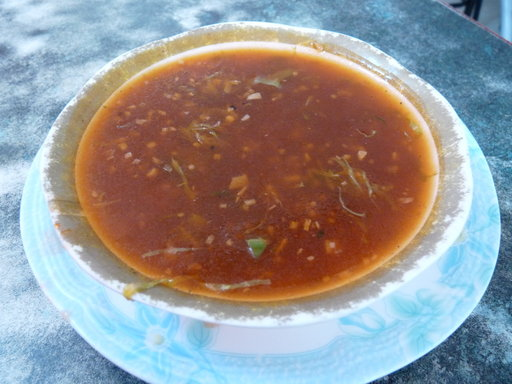

In [ ]:
print(f"Class name: {class_names[train_data[805][1]]}")
train_data[805][0]

### 1.2 Find the subset of pizza, steak, sushi classes

* From `../data_dir/food-01/images/[CLASS_NAME]/[IMAGES].jpg`, we will get the list of different target image classes filenames and copy those images to separate folders.
* We will get random 10% images of each of the targetted classes from both the datasets.

In [ ]:
import random

data_path = data_dir / "food-101" / "images"
target_classes = ["pizza", "steak", "sushi"]

# Amount of data to get
amount_to_get = 0.2

# Create functions to separate a random amount of data
def get_subset(image_path=data_path,
               data_splits=["train", "test"],
               target_classes=["pizza", "steak", "sushi"],
               amount=0.1,
               seed=42):

  random.seed(seed)
  label_splits={}

  # Get labels
  for data_split in data_splits:
    print(f"[INFO] Creating image split for: {data_split}")
    label_path = data_dir / "food-101" / "meta" / f"{data_split}.txt"
    with open(label_path, "r") as f:
      # Get all the label names: pizza, steak, sushi, hot_and_sour_soup
      labels = [line.strip("\n") for line in f.readlines() if line.split("/")[0] in target_classes]

      # Get random subset of traget classes image ID's
      number_of_samples = round(amount * len(labels))
      print(f"[INFO] Getting random susbset of {number_of_samples} images")
      sampled_images = random.sample(labels, k=number_of_samples)

      # Apply full paths
      image_paths = [pathlib.Path(str(image_path / sample_image) + ".jpg") for sample_image in sampled_images]
      label_splits[data_split] = image_paths
  return label_splits

label_splits = get_subset(amount=amount_to_get)
print("________________________________LABEL_SPLITS______________________________________")
label_splits["train"][:10]


[INFO] Creating image split for: train
[INFO] Getting random susbset of 450 images
[INFO] Creating image split for: test
[INFO] Getting random susbset of 150 images
________________________________LABEL_SPLITS______________________________________


[PosixPath('food-101_data/food-101/images/pizza/3269634.jpg'),
 PosixPath('food-101_data/food-101/images/pizza/1524655.jpg'),
 PosixPath('food-101_data/food-101/images/steak/2825100.jpg'),
 PosixPath('food-101_data/food-101/images/steak/225990.jpg'),
 PosixPath('food-101_data/food-101/images/steak/1839481.jpg'),
 PosixPath('food-101_data/food-101/images/pizza/38349.jpg'),
 PosixPath('food-101_data/food-101/images/pizza/3018077.jpg'),
 PosixPath('food-101_data/food-101/images/sushi/93139.jpg'),
 PosixPath('food-101_data/food-101/images/pizza/2702825.jpg'),
 PosixPath('food-101_data/food-101/images/sushi/200025.jpg')]

### 1.3 Move training and testing images to their dedicated folders

In [ ]:
# Create target directory path
target_dir_name = f"./food_data_subset_{str(int(amount_to_get*100))}_percent"
print(f"Creating directory: '{target_dir_name}'")

# Setup the directories
target_dir = pathlib.Path(target_dir_name)

# Make the directories
target_dir.mkdir(parents=True, exist_ok=True)

Creating directory: './food_data_subset_20_percent'


In [ ]:
import shutil

for split_type in label_splits.keys():
  for image_path in label_splits[split_type]:
    dest_dir = target_dir / split_type / image_path.parent.stem / image_path.name
    dest_dir.parent.mkdir(parents=True, exist_ok=True)
    print(f"[INFO] Copying {image_path} to {dest_dir}...")
    shutil.copy2(src=image_path, dst=dest_dir)

[INFO] Copying food-101_data/food-101/images/pizza/3269634.jpg to food_data_subset_20_percent/train/pizza/3269634.jpg...
[INFO] Copying food-101_data/food-101/images/pizza/1524655.jpg to food_data_subset_20_percent/train/pizza/1524655.jpg...
[INFO] Copying food-101_data/food-101/images/steak/2825100.jpg to food_data_subset_20_percent/train/steak/2825100.jpg...
[INFO] Copying food-101_data/food-101/images/steak/225990.jpg to food_data_subset_20_percent/train/steak/225990.jpg...
[INFO] Copying food-101_data/food-101/images/steak/1839481.jpg to food_data_subset_20_percent/train/steak/1839481.jpg...
[INFO] Copying food-101_data/food-101/images/pizza/38349.jpg to food_data_subset_20_percent/train/pizza/38349.jpg...
[INFO] Copying food-101_data/food-101/images/pizza/3018077.jpg to food_data_subset_20_percent/train/pizza/3018077.jpg...
[INFO] Copying food-101_data/food-101/images/sushi/93139.jpg to food_data_subset_20_percent/train/sushi/93139.jpg...
[INFO] Copying food-101_data/food-101/imag

## Zip food_data_subset_20_percent to be more easily transported


In [ ]:
# Zip food_data_subset_ images
zip_file_name = data_dir / f"food_data_subset_{str(int(amount_to_get*100))}_percent"
shutil.make_archive(zip_file_name,
                    format="zip",
                    root_dir=target_dir)

'/content/food-101_data/food_data_subset_20_percent.zip'

### Unzip the file and download the data, if needed.

We skip this step as we have made the data subset in this file only.

## 2. Data preparation and exploration

In [ ]:
# Check lengths of directories
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str): target directory

  Returns:
    A print out of:
      number of subdirectories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  import os
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(target_dir)

There are 3 directories and 1 images in 'food_data_subset_20_percent'.
There are 0 directories and 0 images in 'food_data_subset_20_percent/.ipynb_checkpoints'.
There are 3 directories and 0 images in 'food_data_subset_20_percent/test'.
There are 0 directories and 46 images in 'food_data_subset_20_percent/test/sushi'.
There are 0 directories and 58 images in 'food_data_subset_20_percent/test/steak'.
There are 0 directories and 46 images in 'food_data_subset_20_percent/test/pizza'.
There are 3 directories and 0 images in 'food_data_subset_20_percent/train'.
There are 0 directories and 150 images in 'food_data_subset_20_percent/train/sushi'.
There are 0 directories and 146 images in 'food_data_subset_20_percent/train/steak'.
There are 0 directories and 154 images in 'food_data_subset_20_percent/train/pizza'.


In [ ]:
# Set up train and test paths
train_dir = target_dir / "train"
test_dir = target_dir / "test"

train_dir, test_dir, target_dir

(PosixPath('food_data_subset_20_percent/train'),
 PosixPath('food_data_subset_20_percent/test'),
 PosixPath('food_data_subset_20_percent'))

### 2.1 Visualizing the image

Write code to:
1. Get all of the image paths
2. Pick a random image path using Python's `random.choice()`.
3. Get the image class name using `pathlib.Path.parent.stem`.
4. Since we're working with images, let us open the image with Python's `PIL`.
5. Show the image and print te metadata.


In [ ]:
import random
from PIL import Image # used for image procssing
from pathlib import Path

Random image path: food_data_subset_20_percent/train/pizza/2885796.jpg
Random image class name: pizza
Image size: 512 x 512


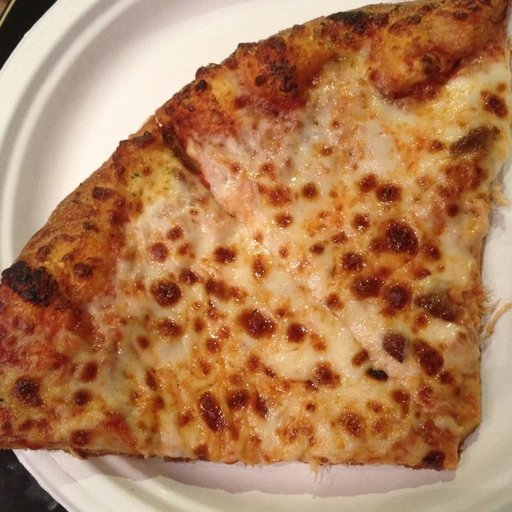

In [ ]:
random.seed(1234)

# 1. Get all of the image paths
image_path_list = list(target_dir.glob("*/*/*.jpg")) # * means, for test/train, pizza/steak.sushi, all the images

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get the image class name
random_image_class_name = random_image_path.parent.stem

# 4. Open the image with Python's PIL
img = Image.open(random_image_path)

# 5. Show the image and print te metadata.
print(f"Random image path: {random_image_path}")
print(f"Random image class name: {random_image_class_name}")
print(f"Image size: {img.width} x {img.height}")
img

(-0.5, 511.5, 511.5, -0.5)

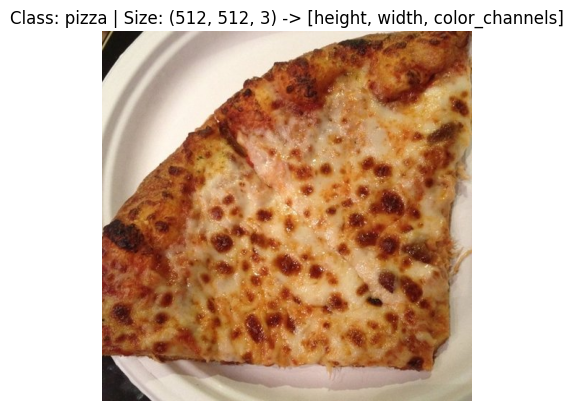

In [ ]:
# Visualize image using Matplotlib
import numpy as np
import matplotlib.pyplot as plt

# plt.imshow(img)
# plt.title(f"Class: {random_image_class_name} | Size: {img.size}")
# plt.axis(False)
# plt.show()

img_as_array = np.asarray(img)
plt.imshow(img_as_array)
plt.title(f"Class: {random_image_class_name} | Size: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)


array([[[109,  72,  30],
        [114,  76,  39],
        [108,  71,  42],
        ...,
        [109,  59,  36],
        [101,  54,  28],
        [112,  65,  37]],

       [[124,  87,  45],
        [115,  80,  42],
        [108,  71,  42],
        ...,
        [110,  62,  39],
        [110,  63,  37],
        [115,  70,  41]],

       [[130,  95,  53],
        [120,  85,  47],
        [115,  79,  47],
        ...,
        [108,  62,  39],
        [119,  73,  49],
        [122,  78,  51]],

       ...,

       [[ 41,  31,  32],
        [ 42,  32,  33],
        [ 43,  33,  34],
        ...,
        [154, 143, 125],
        [153, 141, 125],
        [153, 141, 125]],

       [[ 42,  32,  33],
        [ 42,  32,  33],
        [ 42,  32,  33],
        ...,
        [155, 143, 127],
        [155, 143, 127],
        [154, 142, 126]],

       [[ 42,  32,  33],
        [ 41,  31,  32],
        [ 41,  31,  32],
        ...,
        [155, 143, 127],
        [154, 142, 126],
        [154, 142, 126]]], dtype=uint8)
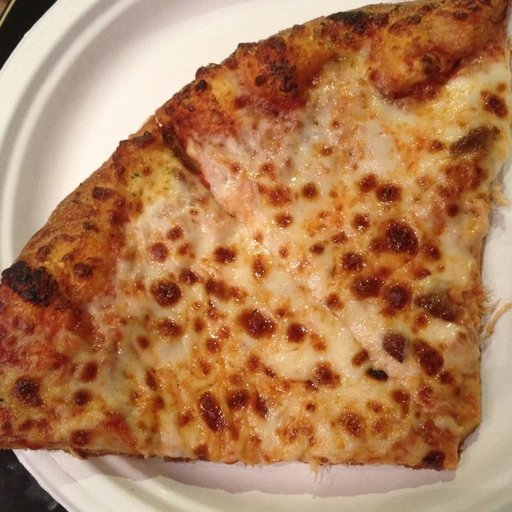

In [ ]:
img_as_array

## 3. Transforming Data

Before we can use our image data with PyTorch:
1. Turn your target data into tensors (in our case, numerical representation of out images).
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.util.data.DataLoader`, we will call these `Dataset` and `DataLoader`.

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
train_dir, test_dir

(PosixPath('food_data_subset_20_percent/train'),
 PosixPath('food_data_subset_20_percent/test'))

### 3.1 Transforming data with  `torchvision.transforms` - https://pytorch.org/vision/stable/transforms.html

In [ ]:
# Write a transform for image

# To combine tranforms together, we can use transforms.Compose / nn.Sequential
data_transform = transforms.Compose([
    # Resize images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly --> form of data augmentation to increase diversity of out dataset
    transforms.RandomHorizontalFlip(p=(0.5)), # 50% of the images will be flipped
    # Turn images to torch.Tensor
    transforms.ToTensor() # Convert PIL iamge or numpy.ndarray to tensor, it converts (H, W, C) --> (C, H, W)
])

In [ ]:
data_transform(img).shape, data_transform(img).dtype

(torch.Size([3, 64, 64]), torch.float32)

### 3.2 Visualizing our tranformed(into tensors) images

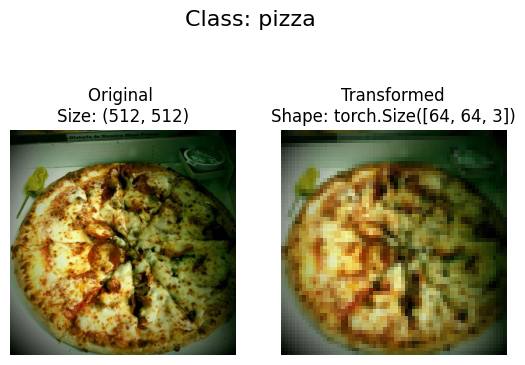

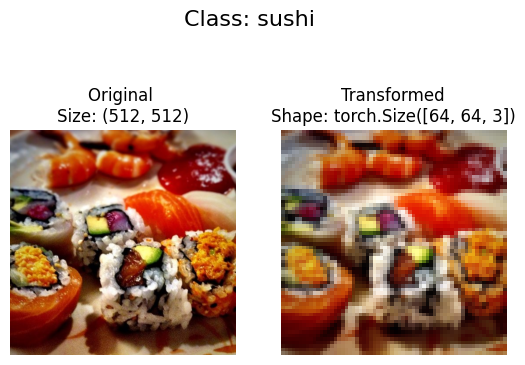

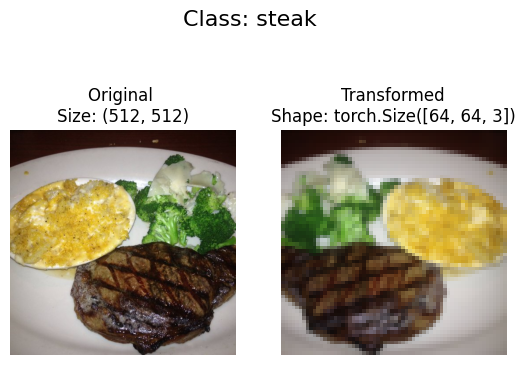

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=None):
  """
  Selects random images form a apth of images and load/transforms them, then plots the original vs transformed version."""
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f) # Show original image
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis("off")
      # Transform the image
      transformed_image = transform(f).permute(1, 2, 0) # Show the transformed version
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)


plot_transformed_images(image_paths = image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=None)

## 4. Option 1: Loading image data using `ImageFolder`: https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html

We can load image classification data using `torchvision.datasets.ImageFolder`

In [ ]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                              transform=data_transform,
                              target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                             transform=data_transform,
                             target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 450
     Root location: food_data_subset_20_percent/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 150
     Root location: food_data_subset_20_percent/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Check the lengths of our dataset
len(train_data), len(test_data)

(450, 150)

In [ ]:
train_data.samples[1]

('food_data_subset_20_percent/train/pizza/1011404.jpg', 0)

### 4.1 Visualize on train_data to get single image and label

In [ ]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor: \n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor: 
 tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.

Original Shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Shape after permute: torch.Size([64, 64, 3]) -> [height, width, color_channels]


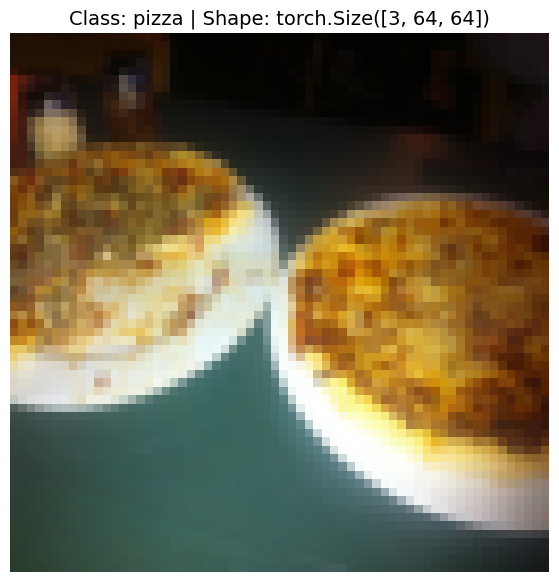

In [ ]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes
print(f"Original Shape: {img.shape} -> [color_channels, height, width]")
print(f"Shape after permute: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.title(f"Class: {class_names[label]} | Shape: {img.shape}", fontsize=14)
plt.axis(False)
plt.imshow(img_permute)

In [ ]:
# Prepare the train and test dataloader
import os
from torch.utils.data import DataLoader

BATCH_SIZE = 64
train_dataloader  = DataLoader(train_data, BATCH_SIZE, shuffle=True, num_workers=os.cpu_count()) # how many cpu cores are used to load the data --> num_workers, higher the num_workers, better it is
test_dataloader = DataLoader(test_data, BATCH_SIZE, num_workers=os.cpu_count(), shuffle=True)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7880cb90a4a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7880cb9da800>)

In [ ]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [ ]:
img, label = next(iter(train_dataloader))

print(f"Image Shape: {img.shape} -> [BATCH_SIZE, color_channels, height, width]")
print(f"Image datatype: {img.dtype}")
print(f"Label Shape: {label.shape}")
print(f"Label datatype: {label.dtype}")

Image Shape: torch.Size([64, 3, 64, 64]) -> [BATCH_SIZE, color_channels, height, width]
Image datatype: torch.float32
Label Shape: torch.Size([64])
Label datatype: torch.int64


## 5. Option 2: Loading Image Data with Custom `Dataset`

1. Want to be able to load images from file
2. Want to be able to get the class anmes from the Dataset.
3. Want to be able to get classes as dictionary form the Dataset.

Pros:
* Can create a `Dataset` out of almost anything.
* Not limited to PyTorch pre-built `Dataset` fucntions.

Cons:
* Even though we can create `Dataset` out of almost anything, it does not mean that it will work.
* Using a custom `Dataset` often results in us writing more code, which could be pron to errors or performance issues.

In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

### 5.1 Creating a helping function to get class names

We want a function to:
1. Get the class using `os.scandir()` to traverse a target directly.
2. Raise an error if the class names aren't found.
3. Turn the class names into a dict, list and return them.

All custom dataset sin PyTorch, often subclasses `torch.utils.data.Dataset`.

In [ ]:
# Setup the path for target directory
target_directory = train_dir
print(f"Train Directory: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Train Directory: food_data_subset_20_percent/train


['pizza', 'steak', 'sushi']

In [ ]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """
  Finds the class names in a target directory.
  """
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. Raise an error if class names not found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

  # 3. Create a dictionary of index to class
  class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
  return classes, class_to_idx

In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `ImageFolder`

To create our own custom dataset, we want to:

1. Subclass `torch.utils.data.Dataset`.
2. Init our subclass with target directory(the directory we'd like to get data from) as well as transform if we'd like to transform our data.
3. Create several attributes:
  * paths - paths of our images
  * transform - the transform we would like to use
  * classes - a list of target classes
  * classes_to_idx - a dict of the target classes mapped to integre labels.
4. Create a function to `load_image()`, this function will open an image.
5. Overwrite the `__len()__` method to return the length of our subset.
6. Overwrite the `__getitem()__` mthod to return a given sample when passed an index.

In [ ]:
# 0. Write a custom dataset class
from torch.utils.data import Dataset
from PIL import Image

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  # 2. Initialize our custom dataset
  def __init__(self, target_dir: str, transform=None):
    # 3. Create class attributes
    # Get all of the image paths
    self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))
    # Setup transform
    self.transform = transform
    # Create classes attribute and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(target_dir)

  # 4. Create a function to load_image(), this function will open an image.
  def load_image(self, index:int) -> Image.Image:
    "Opens an image via a path and returns it."
    image_path = self.paths[index]
    return Image.open(image_path)

  # 5.Overwrite  __len()__ method to return the length of our subset
  def __len__(self) -> int:
    return len(self.paths)

  # 6. Overwrite __getitem()__ method to return a given sample when passed an index
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    """
    Returns one sample of data and label (X, y)
    """
    img = self.load_image(index)
    class_name = self.paths[index].parent.stem # expects path in format: data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    # Transform, if needed
    if self.transform:
      return self.transform(img), class_idx # return data, label (X, y)
    else:
      return img, class_idx # return untransformed image and label

In [ ]:
# Create a tranform
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [ ]:
# Test our ImageFolderCustom
train_data_custom = ImageFolderCustom(target_dir=train_dir,       transform=train_transforms)
test_data_custom = ImageFolderCustom(target_dir=test_dir, transform=test_transforms)

train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7880cb9db7c0>,
 <__main__.ImageFolderCustom at 0x7880cb9d9d50>)

In [ ]:
len(train_data), len(train_data_custom)

(450, 450)

In [ ]:
len(test_data), len(test_data_custom)

(150, 150)

In [ ]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [ ]:
train_data_custom.paths[:10]

[PosixPath('food_data_subset_20_percent/train/sushi/3755656.jpg'),
 PosixPath('food_data_subset_20_percent/train/sushi/1674187.jpg'),
 PosixPath('food_data_subset_20_percent/train/sushi/93139.jpg'),
 PosixPath('food_data_subset_20_percent/train/sushi/3004029.jpg'),
 PosixPath('food_data_subset_20_percent/train/sushi/929471.jpg'),
 PosixPath('food_data_subset_20_percent/train/sushi/2168648.jpg'),
 PosixPath('food_data_subset_20_percent/train/sushi/2667370.jpg'),
 PosixPath('food_data_subset_20_percent/train/sushi/3827966.jpg'),
 PosixPath('food_data_subset_20_percent/train/sushi/285268.jpg'),
 PosixPath('food_data_subset_20_percent/train/sushi/1129338.jpg')]

In [ ]:
train_data_custom.transform

Compose(
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
)

### 5.3 Create a function to display random images

1. Take the `Dataset` add a number of parameters such as class names and how many images to visualize.
2. To prevent the diplay getting out of hand, let's cap the number of images to see at 10 at maximum.
3. Set up the random seed for reproducibitlity.
4. Get a lit of random sample indexes from the target directory.
5. Setup the matplotlib plot.
6. Loop through th random sample indexes and plot them with matplotlib.
7. Make sure the dimensions of our images line up with matplotlib(Height-Width-ColorChannels).

In [ ]:
import random
import matplotlib.pyplot as plt

# 1. Crete a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed:int = None):
  # 2. Adjust # images to be displayed if n is too high
  if n >= 10:
    n = 10
    display_shape = False
    print(f"For display purposes, the value of n should not be larger than 10, so, setting it max to a value of 0 and turing off the display_shape option")

  # 3. Set the seed
  if seed:
    random.seed(seed)

  # 4. Get the sample indexes
  random_sample_idx =  random.sample(range(len(dataset)), k=n)

  # 5. Set up the plot
  plt.figure(figsize=(16, 8))

  # 6. Loop through th random sample indexes and plot them with matplotlib.
  for i, target_sample in enumerate(random_sample_idx):
    target_image, target_label = dataset[target_sample][0], dataset[target_sample][1]

    # 7. Adjust tensor dimensions for plotting
    target_image_adjust = target_image.permute(1, 2, 0)

    # Plot the adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(target_image_adjust)
    plt.axis("off")
    if classes:
      title = f"class: {classes[target_label]}"
      if display_shape:
        title = title + f"\nshape: {target_image_adjust.shape}"
      plt.title(title)

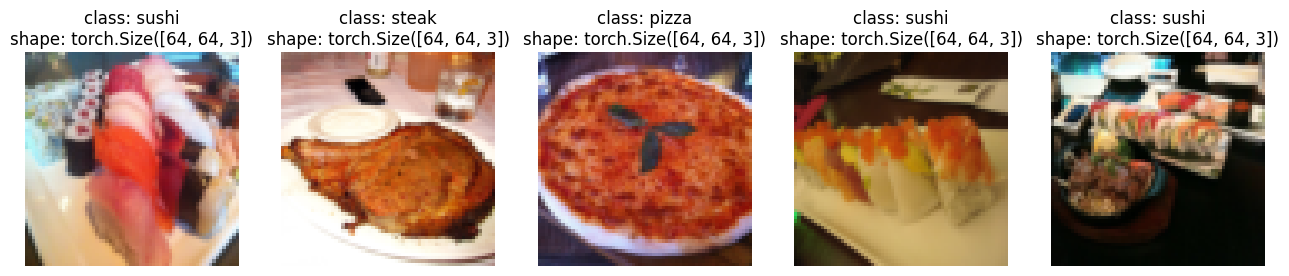

In [ ]:
# Display random images from the ImageFolder created Dataset
display_random_images(dataset=train_data,
                      classes=class_names,
                      n=5,
                      display_shape=True,
                      seed=None)

For display purposes, the value of n should not be larger than 10, so, setting it max to a value of 0 and turing off the display_shape option


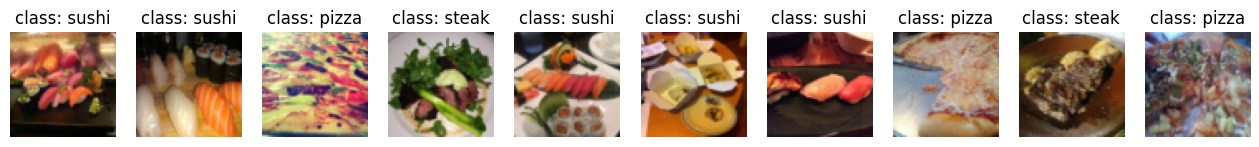

In [ ]:
# Display random images from csutom Dataset
display_random_images(dataset=train_data_custom,
                      classes=class_names,
                      n=10,
                      display_shape=True,
                      seed=None)

### 5.4 Turn custom loaded images to DataLoader

In [ ]:
from torch.utils.data import DataLoader
import os

BATCH_SIZE = 32

train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE, shuffle=True,
                                     num_workers=os.cpu_count())
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=os.cpu_count())

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7880d1893850>,
 <torch.utils.data.dataloader.DataLoader at 0x7880d13cf670>)

In [ ]:
# Get image and label from custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))

img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

## 6. Other forms of transforms (data augmentation)

Data augmentation is the process of artificially adding diversity to your training data.


In the case of image data, this may mean applying various image transformations to the training images.

This practice results in a model that is more generalizable to unseen data.

Let's take a look at one particular type of data augmentation used to train PyTorch vision models to state of the art levels... https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/

In [ ]:
# Let's look at trivialaugment - https://pytorch.org/vision/main/generated/torchvision.transforms.TrivialAugmentWide.html

from torchvision import disable_beta_transforms_warning

train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

In [ ]:
# Get all image paths
image_path_list = list(target_dir.glob("*/*/*.jpg"))

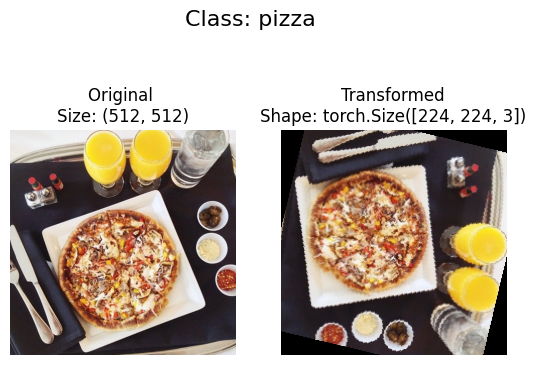

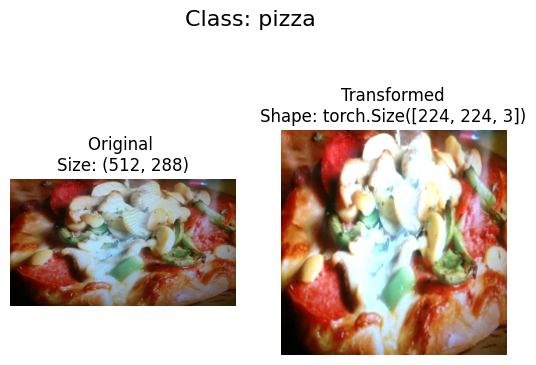

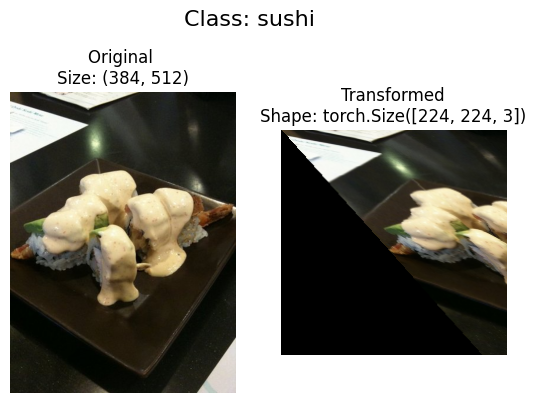

In [ ]:
# Plot random transformed images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=3,
    seed=None
)

## 7. Replicating TinyVGG architechture


Relicate the model from - https://poloclub.github.io/cnn-explainer/

### 7.1 Creating transforms and loading data for Model 0

In [ ]:
# Create a simple transform with data augmentation
simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [ ]:
# 1. Load and transform the data
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

# 2. Turn the data into DataLoader
import os
from torch.utils.data import dataloader

# Setup the batch size and no. of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# Create the dataloaders
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=True,
                                    num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)


### 7.2 Create TinyVGG model class

In [ ]:
class TinyVGGModel(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer: https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self,
              input_shape: int,
              hidden_units: int,
              output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2,
                   stride=2) # default stride value is same as kernel_size
    )
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2,
                   stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )


  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x
    return self.classifier(self.conv_block_2(self.conv_block_1(x))) # benefitted from operation fusion - https://horace.io/brrr_intro.html


In [ ]:
torch.manual_seed(42)

device = "gpu" if torch.cuda.is_available() else "cpu"

# Initialize the model and move it to the correct device (GPU or CPU)
model_0 = TinyVGGModel(input_shape=3,  # Number of color channels in the image data (e.g., RGB = 3)
                       hidden_units=10,  # Number of hidden units in the model
                       output_shape=len(class_names)  # Number of output classes
                      )

# Print the model architecture
print(model_0)

TinyVGGModel(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)


### 7.4 Try a forward pass on a single image (to test the model)

In [ ]:
# Get a single image batch
image_batch, label_batch = next(iter(train_dataloader_simple))

image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
# Try a forward pass
model_0(image_batch)

tensor([[ 0.0212, -0.0040,  0.0116],
        [ 0.0190, -0.0012,  0.0085],
        [ 0.0224, -0.0014,  0.0080],
        [ 0.0206, -0.0046,  0.0091],
        [ 0.0220, -0.0016,  0.0100],
        [ 0.0195,  0.0004,  0.0091],
        [ 0.0230, -0.0043,  0.0122],
        [ 0.0182,  0.0006,  0.0116],
        [ 0.0200,  0.0003,  0.0093],
        [ 0.0200,  0.0005,  0.0105],
        [ 0.0212, -0.0030,  0.0087],
        [ 0.0205, -0.0024,  0.0106],
        [ 0.0206, -0.0038,  0.0112],
        [ 0.0191, -0.0022,  0.0070],
        [ 0.0214, -0.0030,  0.0086],
        [ 0.0169,  0.0044,  0.0053],
        [ 0.0243, -0.0032,  0.0113],
        [ 0.0220,  0.0004,  0.0114],
        [ 0.0183,  0.0006,  0.0094],
        [ 0.0203,  0.0026,  0.0086],
        [ 0.0207, -0.0012,  0.0097],
        [ 0.0208, -0.0029,  0.0089],
        [ 0.0198, -0.0023,  0.0090],
        [ 0.0203, -0.0028,  0.0091],
        [ 0.0191, -0.0002,  0.0105],
        [ 0.0210, -0.0054,  0.0107],
        [ 0.0207,  0.0014,  0.0075],
 

### 7.4  Use `torchInfo` to get an idea of the shpes goingthrough our model

In [ ]:
try:
  import torchinfo
except:
  ! pip install torchinfo
  import torchinfo

In [ ]:
from torchinfo import summary

summary(model_0, input_size=(BATCH_SIZE, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGGModel                             [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 30, 30]          --
│    └─Conv2d: 2-1                       [32, 10, 62, 62]          280
│    └─ReLU: 2-2                         [32, 10, 62, 62]          --
│    └─Conv2d: 2-3                       [32, 10, 60, 60]          910
│    └─ReLU: 2-4                         [32, 10, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 10, 30, 30]          --
├─Sequential: 1-2                        [32, 10, 13, 13]          --
│    └─Conv2d: 2-6                       [32, 10, 28, 28]          910
│    └─ReLU: 2-7                         [32, 10, 28, 28]          --
│    └─Conv2d: 2-8                       [32, 10, 26, 26]          910
│    └─ReLU: 2-9                         [32, 10, 26, 26]          --
│    └─MaxPool2d: 2-10                   [32, 10, 13, 13]          --
├─Sequentia

### 7.5 Create a train and test loop functions
* `train_step()` - takes in the model and dataloader and trains the models on the dataloader.
* `test_step()` - takes in the model and dataloader and evaluates the model on the dataloader.

In [ ]:
# Create the train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device ):
  # Put the model in train mode
  model.train()

  # Setup the train_loss and train_acc
  train_loss, train_acc = 0, 0

  # Loop through each of the batches of data present inside dataloader
  for batch, (X, y) in enumerate(dataloader):
    # Send the data batch to the target device
    X, y = X.to(device), y.to(device)

    # 1. Do the forward pass
    y_preds = model(X) # y_logits

    # 2. Calculate the loss
    loss = loss_fn(y_preds, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss Backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate the accuracy
    y_pred_class = torch.argmax(torch.softmax(y_preds, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item() / len(y_preds)

  # Adjust the metrics to get the average per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [ ]:
# Create a test_step()
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy
  test_loss, test_acc = 0, 0

  # Turn on infernece mode
  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader):
      # Send the data batch to the target device
      X, y = X.to(device), y.to(device)

      # 1. Do the forward pass
      test_preds = model(X) # logits

      # 2. Calculate the loss
      loss = loss_fn(test_preds, y)
      test_loss += loss.item()

      # Calculate the accuracy
      test_pred_class = torch.argmax(torch.softmax(test_preds, dim=1), dim=1)
      test_acc += (test_pred_class == y).sum().item() / len(test_preds)

  # Adjust the metrics to get the average per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc



### 7.6 Creating a `train()` function to combine the `train_step()` and `test_step()` function.

In [ ]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int=5,
          device=device):

  results = {
    "train_loss": [],
    "train_acc": [],
    "test_loss": [],
    "test_acc": []
  }

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                      dataloader=train_dataloader,
                                      loss_fn=loss_fn,
                                      optimizer=optimizer,
                                      device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    print(f"Epoch: {epoch+1} | Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc:.4f} | Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results


### 7.7 Train and evaluate model 0

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

device = "cuda" if torch.cuda.is_available() else "cpu"

# Set the no. of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGGModel
model_0 = TinyVGGModel(input_shape=3,
                       hidden_units=10,
                       output_shape=len(train_data.classes))

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model_0.to(device),
                        train_dataloader_simple,
                        test_dataloader_simple,
                        optimizer,
                        loss_fn,
                        NUM_EPOCHS,
                        device)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | Train Loss: 1.1047 | Train Accuracy: 0.3146 | Test Loss: 1.0972 | Test Accuracy: 0.2875
Epoch: 2 | Train Loss: 1.0887 | Train Accuracy: 0.4021 | Test Loss: 1.0741 | Test Accuracy: 0.4290
Epoch: 3 | Train Loss: 1.0555 | Train Accuracy: 0.4938 | Test Loss: 1.0409 | Test Accuracy: 0.4665
Epoch: 4 | Train Loss: 0.9822 | Train Accuracy: 0.5292 | Test Loss: 0.9782 | Test Accuracy: 0.5392
Epoch: 5 | Train Loss: 0.9814 | Train Accuracy: 0.4813 | Test Loss: 0.9326 | Test Accuracy: 0.5756
Total training time: 26.279 seconds


In [ ]:
model_0_results

{'train_loss': [1.1046599706013998,
  1.0886549711227418,
  1.0555130004882813,
  0.9822142004966736,
  0.981415311495463],
 'train_acc': [0.3145833333333333,
  0.40208333333333335,
  0.49375,
  0.5291666666666667,
  0.48125],
 'test_loss': [1.097169041633606,
  1.0740573167800904,
  1.0409000396728516,
  0.9781762003898621,
  0.9325553178787231],
 'test_acc': [0.2875,
  0.42897727272727276,
  0.46647727272727274,
  0.5392045454545454,
  0.5755681818181818]}

### 7.8 Plot the loss curve of Model 0

A **loss curve** is a way to tarcking the model's progress over time.

Guide - https://wandb.ai/mostafaibrahim17/ml-articles/reports/A-Deep-Dive-Into-Learning-Curves-in-Machine-Learning--Vmlldzo0NjA1ODY0

In [ ]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
  """Plots training curves of a results dictionary.

  Args:
    results (dict): dictionary
  """

  # Get the loss values of the results dictionary (training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy values of the results dictionary (training and test)
  accuracy = results["train_acc"]
  test_accuracy = results["test_loss"]

  # Figure out jow many epochs there were
  epochs = range(len(results["train_loss"]))

  # Set up a plot
  plt.figure(figsize=(15, 7))

  # Plot loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

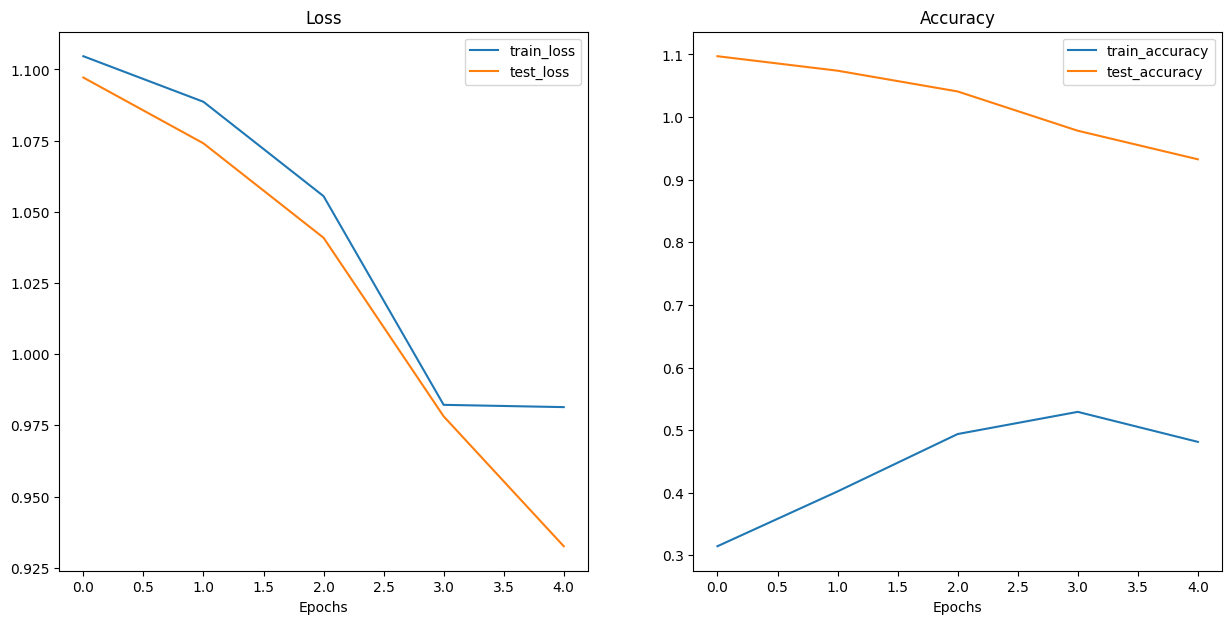

In [ ]:
plot_loss_curves(model_0_results)

## 8. Overfitting/Underfitting

How to deal with overfitting?

* **Get more data** - Give model more chance to learn patterns between the data.
* **Data Augmentation** - Increase dversity of thr training dataset without collecting new data.
* **Better data** - Remove poor data samples.
* **Use transfer learning** - Take a model's pre-learned patterns ans tweak it as per the problem statement.
* **Simplify model** - Model is too complicated in case of overfitting. Reduce no. of layers/hidden units.
* **[Use learning rate decay](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)** - The closer you re to convergance, the lower will be the update values for the weight and bias.
* **Use early stopping** - Stop the model's training before it begins to overfit.

How to deal with underfitting?

* **Use transfer learning** - Take a model's pre-learned patterns ans tweak it as per the problem statement.
* **Add more layer/hidden units to model** - Model is too complicated in case of overfitting. Increase no. of layers/hidden units to give a chance to model to learn more of the patterns.
* **Train for longer** - Increase the number of epochs for which the model is being trained upon.
* **Use less regularization** - Your model is underfiting because you are trying to prevent the case of overfitting too much.
* **Tweak the learning rate** - Chnaces are that at the begining the model's learning rate is too high. Thus, the weights are getting updated by great amount, while the model is not even learning. So, try decresing the learning rate to see better performance of the model.

## 9. Model 1: TinyVGG with Data Augmentation(reduce overfitting)

We use the same model as before with some data augmentation.

### 9.1 Create transform with data augmentation

In [ ]:
# Create training transform with TrivialAugment
from torchvision import transforms

train_transforms_trivial = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
    transforms.ToTensor()
])

test_transforms_simple = transforms.Compose([
  transforms.Resize(size=(64, 64)),
  transforms.ToTensor()
])

### 9.2 Create train and test `Dataset`'s and `DataLoader`'s with data augmentation

In [ ]:
# Turn image folders into Datasets
from torchvision import datasets

train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transforms_trivial)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transforms_simple)

In [ ]:
# Turn our Datasets into DataLoaders
import os
from torch.utils.data import DataLoader

batch_size = 32
NUM_WORKERS = os.cpu_count()
torch.manual_seed(42)

train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

### 9.3 Construct and train Model 1

This time we will be using the sam model architecture except this time we have augmented the training data

In [ ]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGGModel(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)

model_1

TinyVGGModel(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

Now set up the loss and optimizer and call upon the `train()` function to train and evaluate our model

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model_1,
                        train_dataloader_augmented,
                        test_dataloader_simple,
                        optimizer,
                        loss_fn,
                        NUM_EPOCHS,
                        device)

# End the timer
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | Train Loss: 1.1024 | Train Accuracy: 0.3083 | Test Loss: 1.1021 | Test Accuracy: 0.2875
Epoch: 2 | Train Loss: 1.0973 | Train Accuracy: 0.3771 | Test Loss: 1.0865 | Test Accuracy: 0.3812
Epoch: 3 | Train Loss: 1.0836 | Train Accuracy: 0.4125 | Test Loss: 1.0586 | Test Accuracy: 0.5449
Epoch: 4 | Train Loss: 1.0264 | Train Accuracy: 0.5021 | Test Loss: 1.0019 | Test Accuracy: 0.4688
Epoch: 5 | Train Loss: 0.9982 | Train Accuracy: 0.4917 | Test Loss: 0.9862 | Test Accuracy: 0.4455
Total training time: 22.860 seconds


### 9.4 Plot the loss curves for model 1

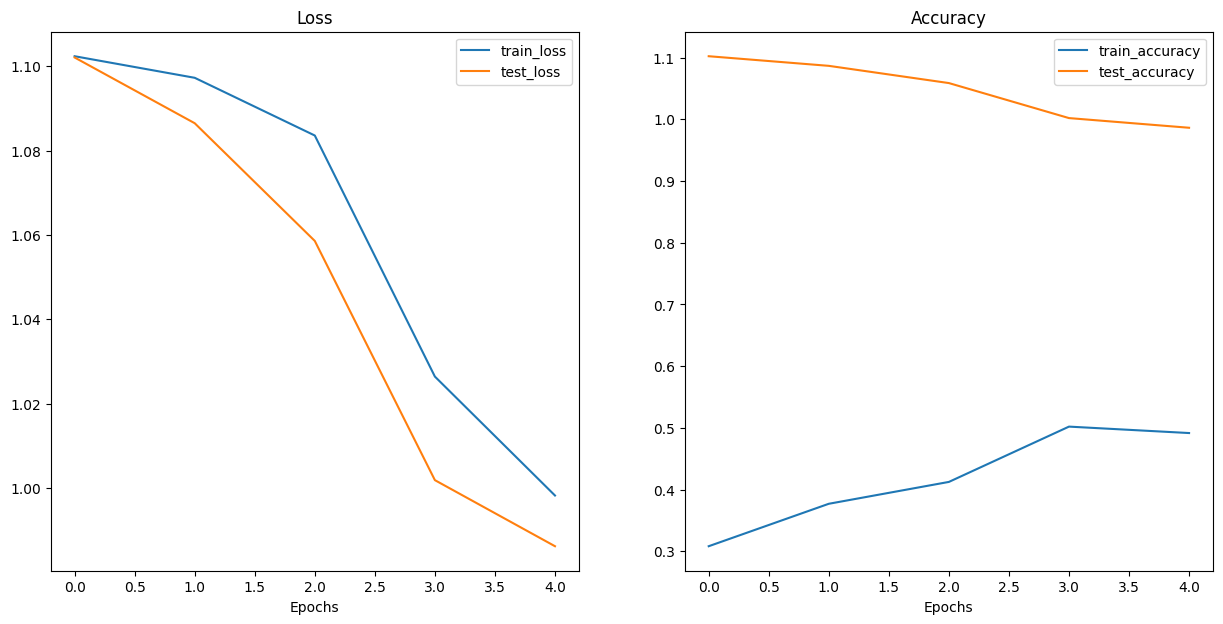

In [ ]:
plot_loss_curves(model_1_results)

## 10. Compare the models results

After evaluating our modelling experiments on their own, it i simportant to compare them to each other.

1. Hard coding
2. Pytorch + Tensorboard - https://pytorch.org/tutorials/recipes/recipes/tensorboard_with_pytorch.html
3. Weights&Biases - https://wandb.ai/site/
4. MLFlow - https://mlflow.org/

In [ ]:
import pandas as pd

model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)

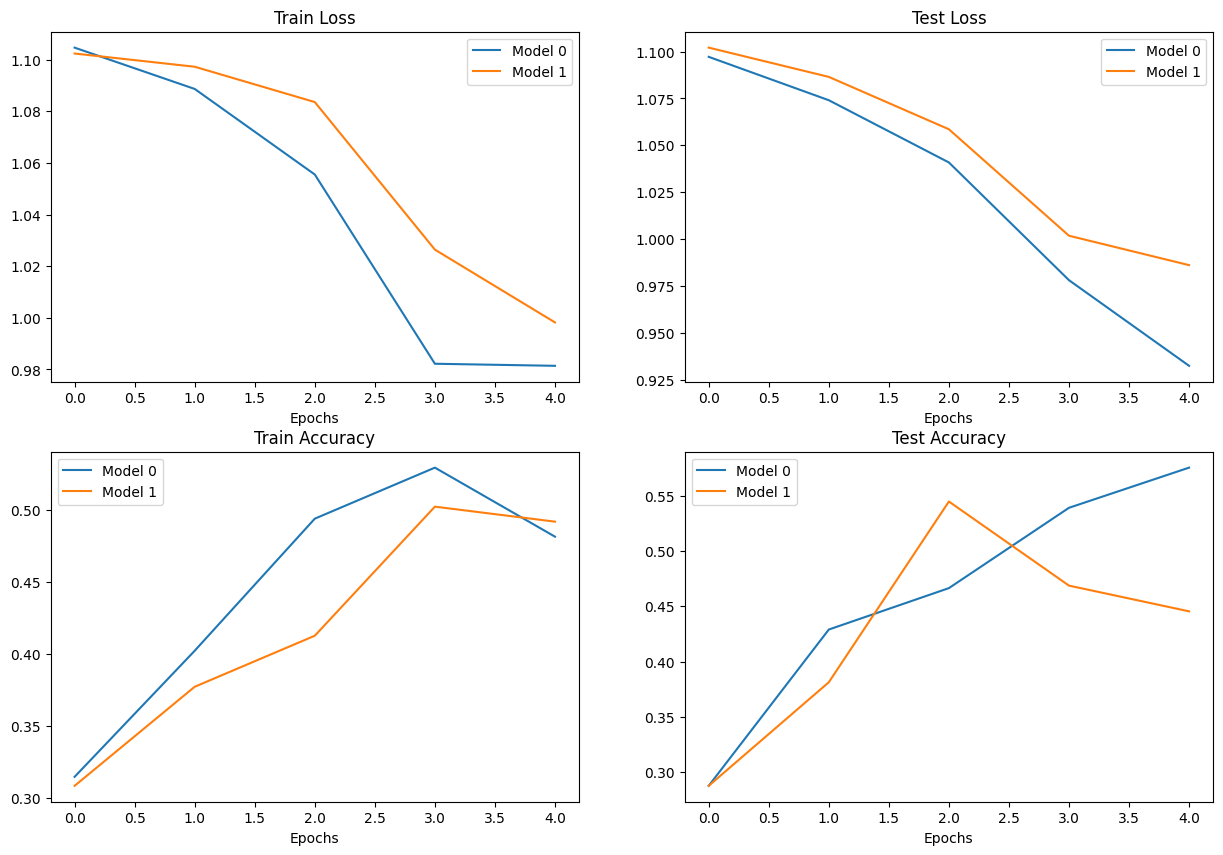

In [ ]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot the train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot the test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend()

## 11. Making a predictionon custom image(which is not in test or training data)

In [ ]:
# Download a custom image
import requests

# Setup a custom image path
custom_image_path = target_dir / "04-pizza-dad.jpeg"

# Download the image if it does not already exist
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    image_url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/images/04-pizza-dad.jpeg"
    request = requests.get(image_url)
    print(f"Downloading {custom_image_path}...")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists, skipping download...")


food_data_subset_20_percent/04-pizza-dad.jpeg already exists, skipping download...


### 11.1 Loading a custom image with PyTorch

We have to make sure our custom image is in the same format as the data our model was trained on.
* In tensor form with datatype(`torch.float32`)
* Of shape 64x64x3
* On the right device

In [ ]:
plt.imshow()

'content/food_data_subset_20_percent/04-pizza-dad.jpeg'

In [ ]:
import torchvision
import torch
import torchvision.transforms as transforms

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Convert to torch.float32
custom_image = custom_image_uint8.type(torch.float32)

# Without normalization, we won't be able to plot the image
# Normalize the image
custom_image /= 255.0
print(custom_image.shape)

# Resize the image to 64x64
resize_transform = transforms.Resize((64, 64))
custom_image_resized = resize_transform(custom_image)


torch.Size([3, 4032, 3024])


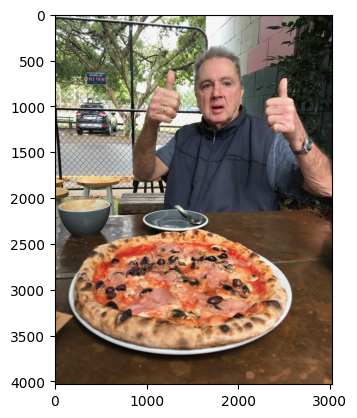

In [ ]:
plt.imshow(custom_image.permute(1, 2, 0))

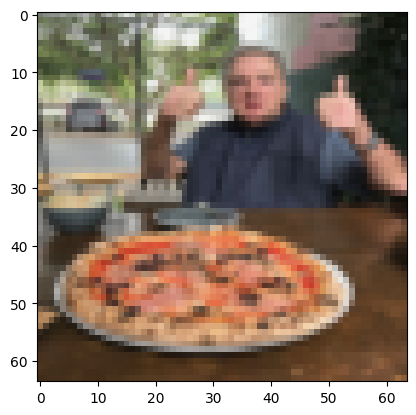

In [ ]:
plt.imshow(custom_image_resized.permute(1, 2, 0))

In [ ]:
# This will produce error since we need to add the batch_size to the first dimension
model_1.eval()
with torch.inference_mode():
  custom_img_pred = model_1(custom_image_resized.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x169 and 1690x3)

In [ ]:
model_1.eval()
with torch.inference_mode():
  custom_img_pred = model_1(custom_image_resized.unsqueeze(dim=0).to(device))

# Convert logits --> prediction probabilities
custom_img_pred_probs = torch.softmax(custom_img_pred, dim=1)
print(f"The predicted probabilities for different classes are: {custom_img_pred_probs}\n")

# Convert pred_probs --> prediction labels
custom_img_pred_labels = torch.argmax(custom_img_pred_probs, dim=1).cpu()

print(f"The predicted class is: {class_names[custom_img_pred_labels]}")

The predicted probabilities for different classes are: tensor([[0.3377, 0.3302, 0.3321]])

The predicted class is: pizza


### 11.2 Making a prediction function to predict custom images

In [ ]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str]=None,
                        transform=None,
                        device=device):
  """Make a prediction on a target image with a trained model and plot the image.
  """

  # Load the image
  target_img = torchvision.io.read_image(str(image_path)).type(torch.float32)


  # Normalize to get image pixel between [0, 1]
  target_img /= 255.0

  # Transform the image to fit the model
  if transform:
    target_img = transform(target_img)

  # Transfer model to the target device
  model.to(device)

  model.eval()

  # Turn on inference mode
  with torch.inference_mode():
    # Add an extra dimension to image
    target_img = target_img.unsqueeze(dim=0)
    # Make a prediction
    target_image_pred = model(target_img).to(device)

  # Convert logits --> prediction probabilities
  target_img_pred_probs = torch.softmax(target_image_pred, dim=1)
  print(f"The predicted probabilities for different classes are: {target_img_pred_probs}\n")

  # Convert pred_probs --> prediction labels
  target_img_pred_labels = torch.argmax(target_img_pred_probs, dim=1).cpu()

  # Plot the image alongside the prediction and prediction probability
  plt.figure()
  if class_names:
    title = f"Pred: {class_names[target_img_pred_labels.cpu()]} | Prob: {target_img_pred_probs.max().cpu():.3f}"
  else:
    title = f"Pred: {target_img_pred_labels} | Prob: {target_img_pred_probs.max().cpu():.3f}"
  plt.imshow(target_img.squeeze().permute(1, 2, 0))
  plt.title(title)
  plt.axis(False)

The predicted probabilities for different classes are: tensor([[0.3377, 0.3302, 0.3321]])



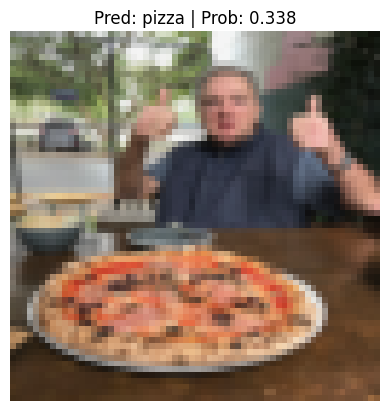

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Pred on our custom data
pred_and_plot_image(
    model=model_1,
    image_path=custom_image_path,
    class_names=class_names,
    transform=custom_image_transform,
    device=device,
)